### 2008 listed company median pb ratio diatribution chart

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from jqdata import *
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta


In [26]:
jq.auth("15960034713","Yc=1999521")

auth success 


In [4]:
trade_days = get_trade_days(start_date='2008-01-01', end_date='2023-05-01')

# Create a new DataFrame to store PB50 data
pb50_data = pd.DataFrame(columns=['date', 'pb50'])

# Get all stock codes
stocks = get_all_securities(types=['stock'])
stock_list = stocks.index.tolist()

for date in trade_days:
    # Get fundamentals data for the current date
    df = get_fundamentals(query(valuation.pb_ratio).filter(valuation.code.in_(stock_list)), date)
    pb50 = df.quantile(0.50)[0]
    
    # Append the date and PB50 data to the new DataFrame
    pb50_data = pb50_data.append({'date': date, 'pb50': pb50}, ignore_index=True)

# Sort by date
pb50_data = pb50_data.sort_values('date')

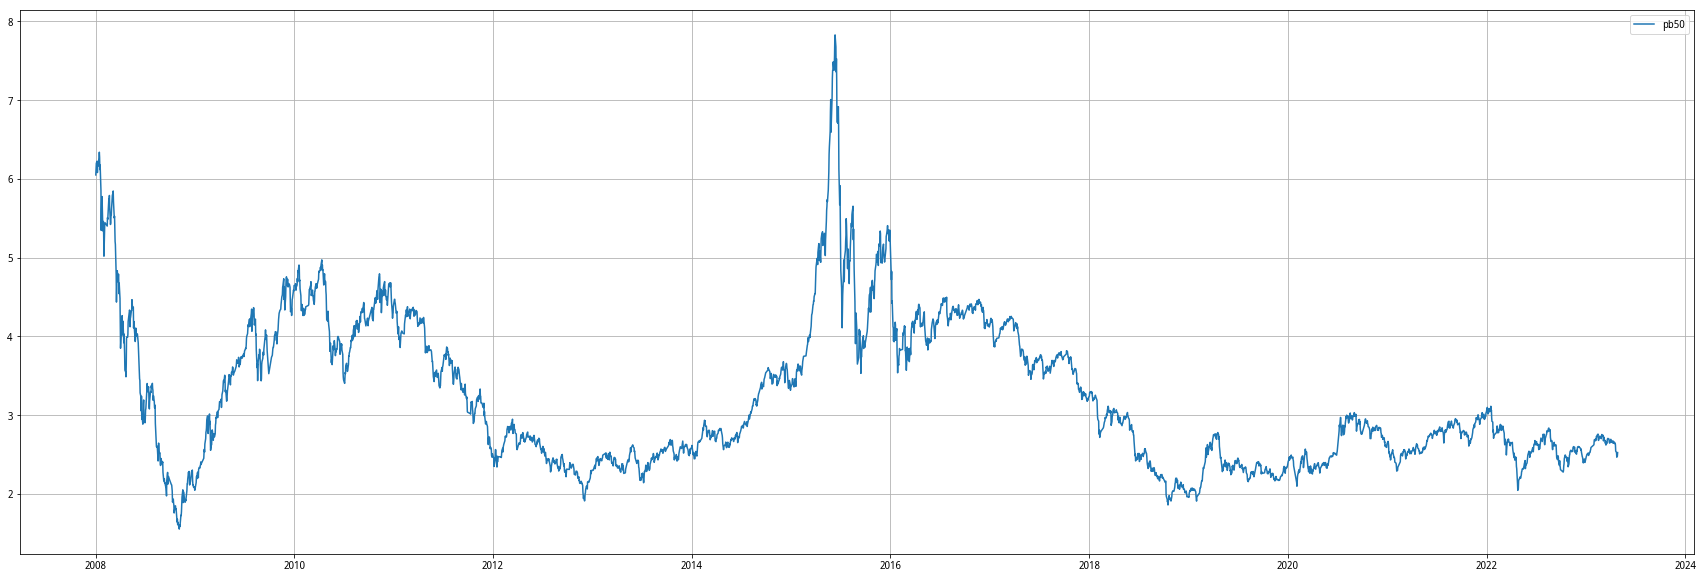

In [8]:
# Plotting the pb50 values
plt.figure(figsize=(30, 10))
plt.plot(pb50_data['date'], pb50_data['pb50'])
plt.grid()
plt.legend(['pb50'])
plt.show()

### 2022 all the companies revenue total

In [9]:
# get the code of the stock
all_stocks = get_all_securities(types=['stock'])

# create a new empty dataframe to store the dataset
df_total = pd.DataFrame()

# going through all the stocks
for stock in all_stocks.index:
    # get the revenue of each company
    q = query(income.operating_revenue).filter(income.code == stock)
    df = get_fundamentals(q, statDate='2022')

    # add the dataset to the dataframe if it is not empty
    if not df.empty:
        df_total = pd.concat([df_total, df])

# get the sum of the operating revenue
print(df_total['operating_revenue'].sum())

71312665257060.88


### Total revenue of all listed companies by industry in 2016

In [14]:
# Create a new empty DataFrame to store the dataset
df_total = pd.DataFrame()

# Create empty lists to store industry names and corresponding revenue
industry_names = []
industry_revenues = []

# Going through all the industries
for industry in industries.index:
    # Get the name of the current industry
    industry_name = industries.loc[industry, 'name']

    # Get all the stocks in the current industry
    stocks = get_industry_stocks(industry_code=industry)

    # Going through all the stocks in the current industry
    for stock in stocks:
        # Get the revenue of each company
        q = query(income.operating_revenue).filter(income.code == stock)
        df = get_fundamentals(q, statDate='2016')

        # Add the dataset to the DataFrame if it is not empty
        if not df.empty:
            # Add the industry information to the DataFrame
            df['sw_l1'] = industry_name
            df_total = pd.concat([df_total, df])

# Calculate the sum of the operating revenue for each industry and divide by 1 trillion (万亿)
industry_revenue = df_total.groupby('sw_l1').sum() / 1e12

# Create a DataFrame to store the industry names and revenue
industry_df = pd.DataFrame({'Name': industry_revenue.index, 'Revenue (万亿)': industry_revenue['operating_revenue']})

# Sort the DataFrame by 'Revenue' column in descending order
industry_df_sorted = industry_df[['Name', 'Revenue (万亿)']].sort_values(by='Revenue (万亿)', ascending=False).reset_index(drop=True)

# Print the sorted DataFrame with the top five industries
top_five_industries = industry_df_sorted.head(5)
top_five_industries


,Name,Revenue (万亿)
0,石油石化I,3.971485
1,建筑装饰I,3.791290
2,银行I,3.766985
3,汽车I,2.238246
4,非银金融I,2.038519


In [22]:
# Export the sorted DataFrame to Excel
industry_df_sorted.to_excel('industry_revenue2016.xlsx', index=False)

### Total revenue of all listed companies by industry in 2017

In [7]:
# Create a new empty DataFrame to store the dataset
df_total = pd.DataFrame()

# Create empty lists to store industry names and corresponding revenue
industry_names = []
industry_revenues = []

# Going through all the industries
for industry in industries.index:
    # Get the name of the current industry
    industry_name = industries.loc[industry, 'name']

    # Get all the stocks in the current industry
    stocks = get_industry_stocks(industry_code=industry)

    # Going through all the stocks in the current industry
    for stock in stocks:
        # Get the revenue of each company
        q = query(income.operating_revenue).filter(income.code == stock)
        df = get_fundamentals(q, statDate='2017')

        # Add the dataset to the DataFrame if it is not empty
        if not df.empty:
            # Add the industry information to the DataFrame
            df['sw_l1'] = industry_name
            df_total = pd.concat([df_total, df])

# Calculate the sum of the operating revenue for each industry and divide by 1 trillion (万亿)
industry_revenue = df_total.groupby('sw_l1').sum() / 1e12

# Create a DataFrame to store the industry names and revenue
industry_df = pd.DataFrame({'Name': industry_revenue.index, 'Revenue (万亿)': industry_revenue['operating_revenue']})

# Sort the DataFrame by 'Revenue' column in descending order
industry_df_sorted = industry_df[['Name', 'Revenue (万亿)']].sort_values(by='Revenue (万亿)', ascending=False).reset_index(drop=True)

# Print the sorted DataFrame with the top five industries
top_five_industries = industry_df_sorted.head(5)
top_five_industries


,Name,Revenue (万亿)
0,石油石化I,4.947659
1,建筑装饰I,4.242303
2,银行I,3.878208
3,汽车I,2.636885
4,非银金融I,2.449176


### Total revenue of all listed companies by industry in 2018

In [8]:
import pandas as pd

# Create a new empty DataFrame to store the dataset
df_total = pd.DataFrame()

# Create empty lists to store industry names and corresponding revenue
industry_names = []
industry_revenues = []

# Going through all the industries
for industry in industries.index:
    # Get the name of the current industry
    industry_name = industries.loc[industry, 'name']

    # Get all the stocks in the current industry
    stocks = get_industry_stocks(industry_code=industry)

    # Going through all the stocks in the current industry
    for stock in stocks:
        # Get the revenue of each company
        q = query(income.operating_revenue).filter(income.code == stock)
        df = get_fundamentals(q, statDate='2018')

        # Add the dataset to the DataFrame if it is not empty
        if not df.empty:
            # Add the industry information to the DataFrame
            df['sw_l1'] = industry_name
            df_total = pd.concat([df_total, df])

# Calculate the sum of the operating revenue for each industry and divide by 1 trillion (万亿)
industry_revenue = df_total.groupby('sw_l1').sum() / 1e12

# Create a DataFrame to store the industry names and revenue
industry_df = pd.DataFrame({'Name': industry_revenue.index, 'Revenue (万亿)': industry_revenue['operating_revenue']})

# Sort the DataFrame by 'Revenue' column in descending order
industry_df_sorted = industry_df[['Name', 'Revenue (万亿)']].sort_values(by='Revenue (万亿)', ascending=False).reset_index(drop=True)

# Print the sorted DataFrame with the top five industries
top_five_industries = industry_df_sorted.head(5)
top_five_industries


,Name,Revenue (万亿)
0,石油石化I,6.000821
1,建筑装饰I,4.747837
2,银行I,4.247929
3,非银金融I,3.040745
4,汽车I,2.725948


### Total revenue of all listed companies by industry in 2019

In [9]:
# Create a new empty DataFrame to store the dataset
df_total = pd.DataFrame()

# Create empty lists to store industry names and corresponding revenue
industry_names = []
industry_revenues = []

# Going through all the industries
for industry in industries.index:
    # Get the name of the current industry
    industry_name = industries.loc[industry, 'name']

    # Get all the stocks in the current industry
    stocks = get_industry_stocks(industry_code=industry)

    # Going through all the stocks in the current industry
    for stock in stocks:
        # Get the revenue of each company
        q = query(income.operating_revenue).filter(income.code == stock)
        df = get_fundamentals(q, statDate='2019')

        # Add the dataset to the DataFrame if it is not empty
        if not df.empty:
            # Add the industry information to the DataFrame
            df['sw_l1'] = industry_name
            df_total = pd.concat([df_total, df])

# Calculate the sum of the operating revenue for each industry and divide by 1 trillion (万亿)
industry_revenue = df_total.groupby('sw_l1').sum() / 1e12

# Create a DataFrame to store the industry names and revenue
industry_df = pd.DataFrame({'Name': industry_revenue.index, 'Revenue (万亿)': industry_revenue['operating_revenue']})

# Sort the DataFrame by 'Revenue' column in descending order
industry_df_sorted = industry_df[['Name', 'Revenue (万亿)']].sort_values(by='Revenue (万亿)', ascending=False).reset_index(drop=True)

# Print the sorted DataFrame with the top five industries
top_five_industries = industry_df_sorted.head(5)
top_five_industries

,Name,Revenue (万亿)
0,石油石化I,6.334009
1,建筑装饰I,5.575230
2,银行I,5.049531
3,非银金融I,3.596425
4,交通运输I,3.061575


### Total revenue of all listed companies by industry in 2020

In [2]:
industries = get_industries(name='sw_l1')

In [10]:
# Create a new empty DataFrame to store the dataset
df_total = pd.DataFrame()

# Create empty lists to store industry names and corresponding revenue
industry_names = []
industry_revenues = []

# Going through all the industries
for industry in industries.index:
    # Get the name of the current industry
    industry_name = industries.loc[industry, 'name']

    # Get all the stocks in the current industry
    stocks = get_industry_stocks(industry_code=industry)

    # Going through all the stocks in the current industry
    for stock in stocks:
        # Get the revenue of each company
        q = query(income.operating_revenue).filter(income.code == stock)
        df = get_fundamentals(q, statDate='2020')

        # Add the dataset to the DataFrame if it is not empty
        if not df.empty:
            # Add the industry information to the DataFrame
            df['sw_l1'] = industry_name
            df_total = pd.concat([df_total, df])

# Calculate the sum of the operating revenue for each industry and divide by 1 trillion (万亿)
industry_revenue = df_total.groupby('sw_l1').sum() / 1e12

# Create a DataFrame to store the industry names and revenue
industry_df = pd.DataFrame({'Name': industry_revenue.index, 'Revenue (万亿)': industry_revenue['operating_revenue']})

# Sort the DataFrame by 'Revenue' column in descending order
industry_df_sorted = industry_df[['Name', 'Revenue (万亿)']].sort_values(by='Revenue (万亿)', ascending=False).reset_index(drop=True)

# Print the sorted DataFrame with the top five industries
top_five_industries = industry_df_sorted.head(5)
top_five_industries

,Name,Revenue (万亿)
0,建筑装饰I,6.382121
1,银行I,5.344556
2,石油石化I,4.905164
3,非银金融I,3.952140
4,交通运输I,3.247959


### Total revenue of all listed companies by industry in 2021

In [11]:
# Create a new empty DataFrame to store the dataset
df_total = pd.DataFrame()

# Create empty lists to store industry names and corresponding revenue
industry_names = []
industry_revenues = []

# Going through all the industries
for industry in industries.index:
    # Get the name of the current industry
    industry_name = industries.loc[industry, 'name']

    # Get all the stocks in the current industry
    stocks = get_industry_stocks(industry_code=industry)

    # Going through all the stocks in the current industry
    for stock in stocks:
        # Get the revenue of each company
        q = query(income.operating_revenue).filter(income.code == stock)
        df = get_fundamentals(q, statDate='2021')

        # Add the dataset to the DataFrame if it is not empty
        if not df.empty:
            # Add the industry information to the DataFrame
            df['sw_l1'] = industry_name
            df_total = pd.concat([df_total, df])

# Calculate the sum of the operating revenue for each industry and divide by 1 trillion (万亿)
industry_revenue = df_total.groupby('sw_l1').sum() / 1e12

# Create a DataFrame to store the industry names and revenue
industry_df = pd.DataFrame({'Name': industry_revenue.index, 'Revenue (万亿)': industry_revenue['operating_revenue']})

# Sort the DataFrame by 'Revenue' column in descending order
industry_df_sorted = industry_df[['Name', 'Revenue (万亿)']].sort_values(by='Revenue (万亿)', ascending=False).reset_index(drop=True)

# Print the sorted DataFrame with the top five industries
top_five_industries = industry_df_sorted.head(5)
top_five_industries

,Name,Revenue (万亿)
0,建筑装饰I,7.740956
1,石油石化I,6.497587
2,银行I,5.811780
3,交通运输I,4.541822
4,非银金融I,4.173130


### Total revenue of all listed companies by industry in 2022

In [12]:
# Create a new empty DataFrame to store the dataset
# Create a new empty DataFrame to store the dataset
df_total = pd.DataFrame()

# Create empty lists to store industry names and corresponding revenue
industry_names = []
industry_revenues = []

# Going through all the industries
for industry in industries.index:
    # Get the name of the current industry
    industry_name = industries.loc[industry, 'name']

    # Get all the stocks in the current industry
    stocks = get_industry_stocks(industry_code=industry)

    # Going through all the stocks in the current industry
    for stock in stocks:
        # Get the revenue of each company
        q = query(income.operating_revenue).filter(income.code == stock)
        df = get_fundamentals(q, statDate='2022')

        # Add the dataset to the DataFrame if it is not empty
        if not df.empty:
            # Add the industry information to the DataFrame
            df['sw_l1'] = industry_name
            df_total = pd.concat([df_total, df])

# Calculate the sum of the operating revenue for each industry and divide by 1 trillion (万亿)
industry_revenue = df_total.groupby('sw_l1').sum() / 1e12

# Create a DataFrame to store the industry names and revenue
industry_df = pd.DataFrame({'Name': industry_revenue.index, 'Revenue (万亿)': industry_revenue['operating_revenue']})

# Sort the DataFrame by 'Revenue' column in descending order
industry_df_sorted = industry_df[['Name', 'Revenue (万亿)']].sort_values(by='Revenue (万亿)', ascending=False).reset_index(drop=True)

# Print the sorted DataFrame with the top five industries
top_five_industries = industry_df_sorted.head(5)
top_five_industries

,Name,Revenue (万亿)
0,建筑装饰I,8.476111
1,石油石化I,8.375284
2,银行I,5.852945
3,交通运输I,4.913987
4,非银金融I,3.952341


#### Jukuan second-class industry

In [5]:
industries = get_industries(name='sw_l2')

In [18]:

# Create a new empty DataFrame to store the dataset
df_total = pd.DataFrame()

# Create empty lists to store industry names and corresponding revenue
industry_names = []
industry_revenues = []

# Going through all the industries
for industry in industries.index:
    # Get the name of the current industry
    industry_name = industries.loc[industry, 'name']

    # Get all the stocks in the current industry
    stocks = get_industry_stocks(industry_code=industry)

    # Going through all the stocks in the current industry
    for stock in stocks:
        # Get the revenue of each company
        q = query(income.operating_revenue).filter(income.code == stock)
        df = get_fundamentals(q, statDate='2022')

        # Add the dataset to the DataFrame if it is not empty
        if not df.empty:
            # Add the industry information to the DataFrame
            df['sw_l2'] = industry_name
            df_total = pd.concat([df_total, df])

# Calculate the sum of the operating revenue for each industry
industry_revenue = df_total.groupby('sw_l2').sum()

In [19]:
# Create a DataFrame to store the industry names and revenue
industry_df = pd.DataFrame({'Name': industry_revenue.index, 'Revenue': industry_revenue['operating_revenue']})

# Sort the DataFrame by 'Revenue' column in descending order
industry_df_sorted = industry_df[['Name', 'Revenue']].sort_values(by='Revenue', ascending=False).reset_index(drop=True)

# Print the sorted DataFrame
industry_df_sorted

,Name,Revenue
0,炼化及贸易II,7.657178e+12
1,基础建设II,4.522044e+12
2,国有大型银行II,3.691273e+12
3,物流II,3.681760e+12
4,保险II,3.276789e+12
5,房屋建设II,2.720987e+12
6,房地产开发II,2.686660e+12
7,工业金属II,2.082287e+12
8,普钢II,1.943545e+12
9,通信运营II,1.839048e+12


### company median pb ratio weekly diatribution chart(2008-2020)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
# Get all trade days between 2008-01-01 and 2010-12-31
trade_days = get_trade_days(start_date='2008-01-01', end_date='2010-12-31')

# Filter the trade days to include only Mondays
trade_weeks = [date for date in trade_days if date.weekday() == 0]

# Create a new DataFrame to store the PB50 data
pb50_data = pd.DataFrame(columns=['date', 'pb50'])

# Get all stock codes
stocks = get_all_securities(types=['stock'])
stock_list = stocks.index.tolist()

# Iterate over each trade week
for date in trade_weeks:
    # Get the trade days for the current week (from Monday to Friday)
    week_dates = get_trade_days(start_date=date, end_date=date + pd.Timedelta(days=4))
    
    # Get the fundamentals data (pb_ratio) for the current week
    df = get_fundamentals(query(valuation.pb_ratio).filter(valuation.code.in_(stock_list)), date)
    
    # Calculate the median pb_ratio for the current week
    pb50 = df['pb_ratio'].median()
    
    # Append the date and pb50 value to the DataFrame
    pb50_data = pb50_data.append({'date': date, 'pb50': pb50}, ignore_index=True)

# Sort the DataFrame by date
pb50_data = pb50_data.sort_values('date')


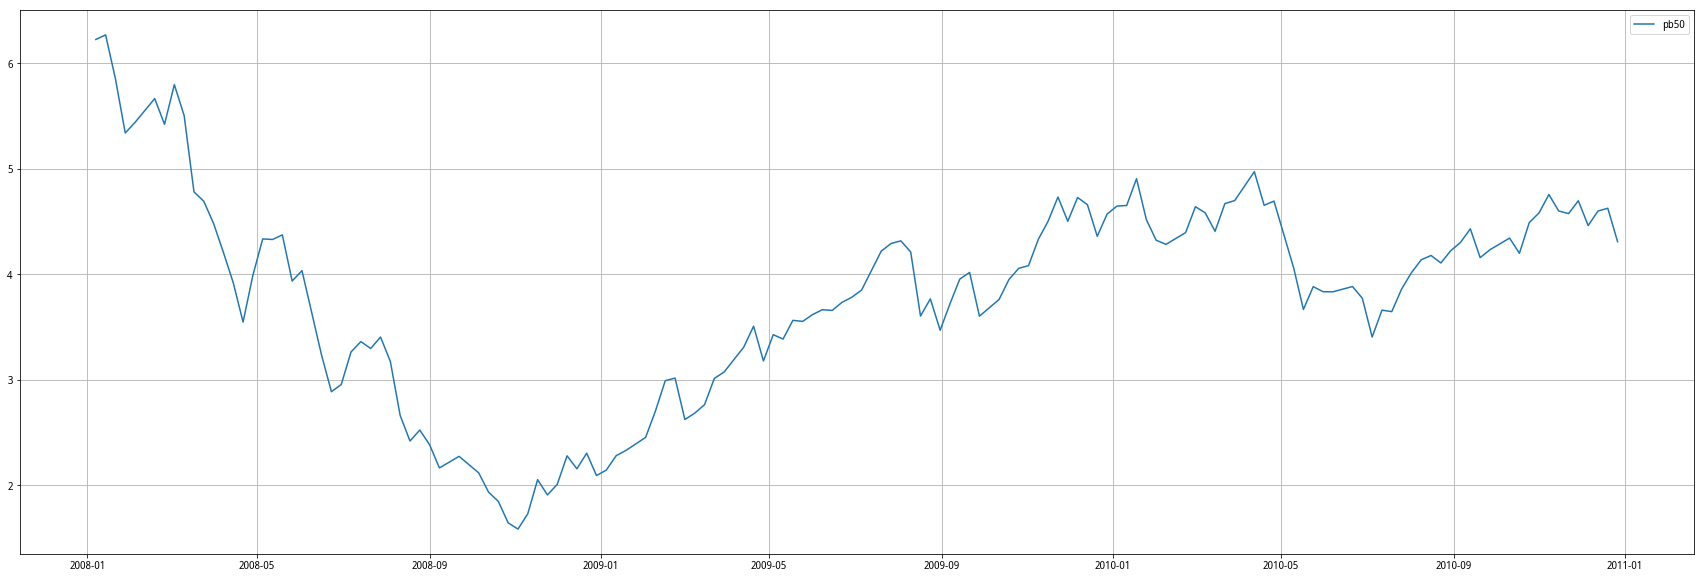

In [3]:
# Plotting the pb50 values
plt.figure(figsize=(30, 10))
plt.plot(pb50_data['date'], pb50_data['pb50'])
plt.grid()
plt.legend(['pb50'])
plt.show()

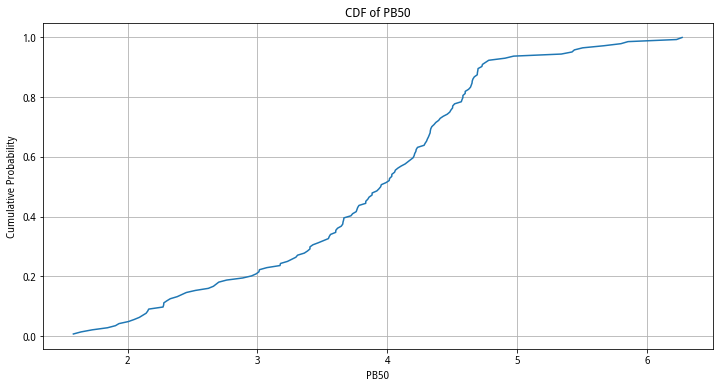

In [6]:
# Assuming you have the pb50_data DataFrame with columns 'date' and 'pb50'

# Extract the pb50 values from the DataFrame
pb50_values = pb50_data['pb50'].values

# Calculate the empirical CDF
def ecdf(x):
    sorted_x = np.sort(x)
    n = sorted_x.size
    y = np.arange(1, n+1) / n4
    return sorted_x, y

x, cdf = ecdf(pb50_values)

# Plot the CDF
plt.figure(figsize=(12, 6))
plt.plot(x, cdf)
plt.xlabel('PB50')
plt.ylabel('Cumulative Probability')
plt.title('CDF of PB50')
plt.grid(True)
plt.show()




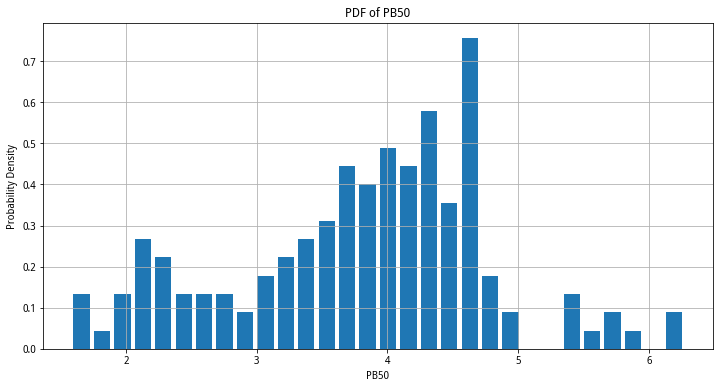

In [10]:
# Assuming you have the pb50_data DataFrame with column 'pb50'

# Extract the pb50 values from the DataFrame
pb50_values = pb50_data['pb50'].values

# Calculate the histogram
hist, bins = np.histogram(pb50_values, bins=30, density=True)

# Calculate the bin centers
bin_centers = (bins[:-1] + bins[1:]) / 2

# Calculate the width of each bar
bar_width = np.diff(bins)[0] * 0.8

# Plot the PDF as a bar chart
plt.figure(figsize=(12, 6))
plt.bar(bin_centers, hist, width=bar_width, align='center')
plt.xlabel('PB50')
plt.ylabel('Probability Density')
plt.title('PDF of PB50')
plt.grid(True)
plt.show()





### company median pb ratio weekly diatribution chart(2011-2015)

In [11]:
# Get all trade days between 2011-01-01 and 2015-12-31
trade_days = get_trade_days(start_date='2011-01-01', end_date='2015-12-31')

# Filter the trade days to include only Mondays
trade_weeks = [date for date in trade_days if date.weekday() == 0]

# Create a new DataFrame to store the PB50 data
pb50_data = pd.DataFrame(columns=['date', 'pb50'])

# Get all stock codes
stocks = get_all_securities(types=['stock'])
stock_list = stocks.index.tolist()

# Iterate over each trade week
for date in trade_weeks:
    # Get the trade days for the current week (from Monday to Friday)
    week_dates = get_trade_days(start_date=date, end_date=date + pd.Timedelta(days=4))
    
    # Get the fundamentals data (pb_ratio) for the current week
    df = get_fundamentals(query(valuation.pb_ratio).filter(valuation.code.in_(stock_list)), date)
    
    # Calculate the median pb_ratio for the current week
    pb50 = df['pb_ratio'].median()
    
    # Append the date and pb50 value to the DataFrame
    pb50_data = pb50_data.append({'date': date, 'pb50': pb50}, ignore_index=True)

# Sort the DataFrame by date
pb50_data = pb50_data.sort_values('date')

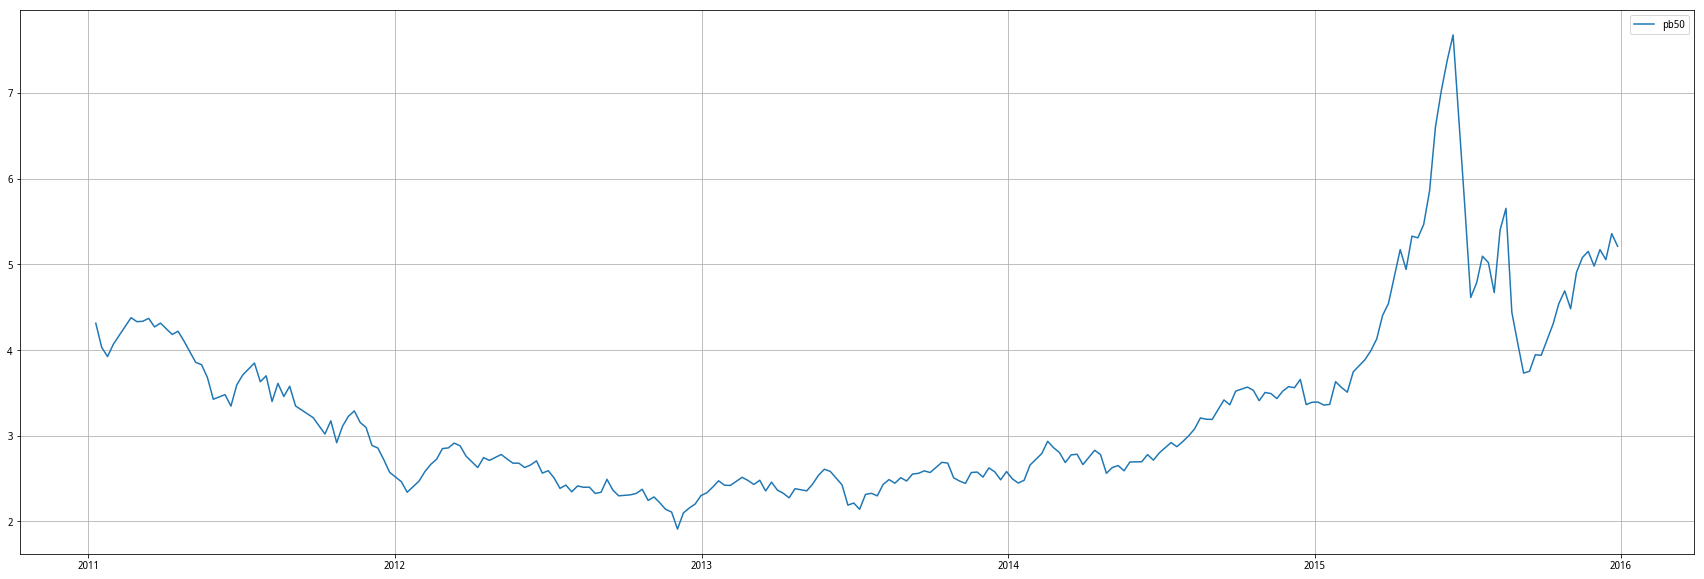

In [12]:
# Plotting the pb50 values
plt.figure(figsize=(30, 10))
plt.plot(pb50_data['date'], pb50_data['pb50'])
plt.grid()
plt.legend(['pb50'])
plt.show()

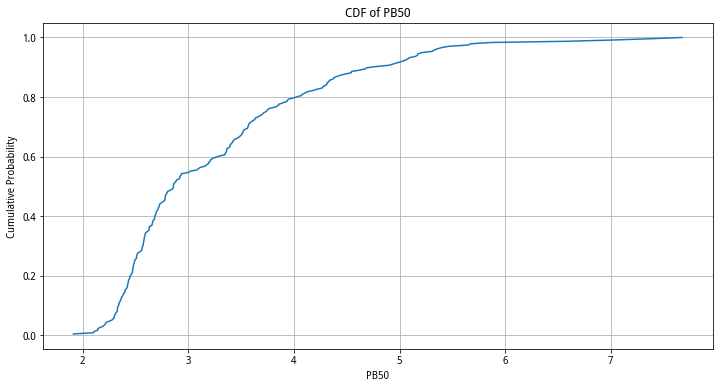

In [13]:
# Assuming you have the pb50_data DataFrame with columns 'date' and 'pb50'

# Extract the pb50 values from the DataFrame
pb50_values = pb50_data['pb50'].values

# Calculate the empirical CDF
def ecdf(x):
    sorted_x = np.sort(x)
    n = sorted_x.size
    y = np.arange(1, n+1) / n
    return sorted_x, y

x, cdf = ecdf(pb50_values)

# Plot the CDF
plt.figure(figsize=(12, 6))
plt.plot(x, cdf)
plt.xlabel('PB50')
plt.ylabel('Cumulative Probability')
plt.title('CDF of PB50')
plt.grid(True)
plt.show()

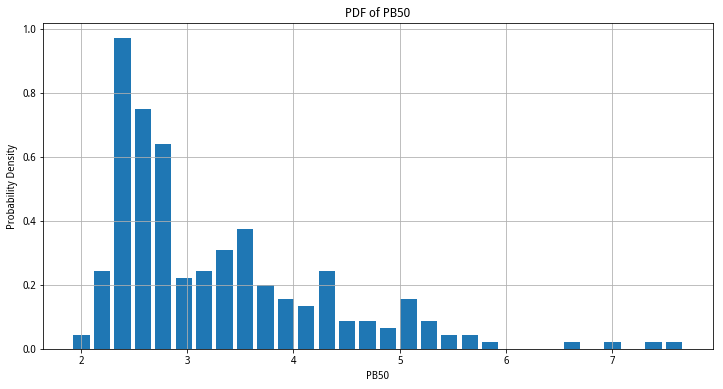

In [14]:
# Assuming you have the pb50_data DataFrame with column 'pb50'

# Extract the pb50 values from the DataFrame
pb50_values = pb50_data['pb50'].values

# Calculate the histogram
hist, bins = np.histogram(pb50_values, bins=30, density=True)

# Calculate the bin centers
bin_centers = (bins[:-1] + bins[1:]) / 2

# Calculate the width of each bar
bar_width = np.diff(bins)[0] * 0.8

# Plot the PDF as a bar chart
plt.figure(figsize=(12, 6))
plt.bar(bin_centers, hist, width=bar_width, align='center')
plt.xlabel('PB50')
plt.ylabel('Probability Density')
plt.title('PDF of PB50')
plt.grid(True)
plt.show()

### company median pb ratio weekly diatribution chart(2016-2020)

In [15]:
# Get all trade days between 2016-01-01 and 2020-12-31
trade_days = get_trade_days(start_date='2016-01-01', end_date='2020-12-31')

# Filter the trade days to include only Mondays
trade_weeks = [date for date in trade_days if date.weekday() == 0]

# Create a new DataFrame to store the PB50 data
pb50_data = pd.DataFrame(columns=['date', 'pb50'])

# Get all stock codes
stocks = get_all_securities(types=['stock'])
stock_list = stocks.index.tolist()

# Iterate over each trade week
for date in trade_weeks:
    # Get the trade days for the current week (from Monday to Friday)
    week_dates = get_trade_days(start_date=date, end_date=date + pd.Timedelta(days=4))
    
    # Get the fundamentals data (pb_ratio) for the current week
    df = get_fundamentals(query(valuation.pb_ratio).filter(valuation.code.in_(stock_list)), date)
    
    # Calculate the median pb_ratio for the current week
    pb50 = df['pb_ratio'].median()
    
    # Append the date and pb50 value to the DataFrame
    pb50_data = pb50_data.append({'date': date, 'pb50': pb50}, ignore_index=True)

# Sort the DataFrame by date
pb50_data = pb50_data.sort_values('date')

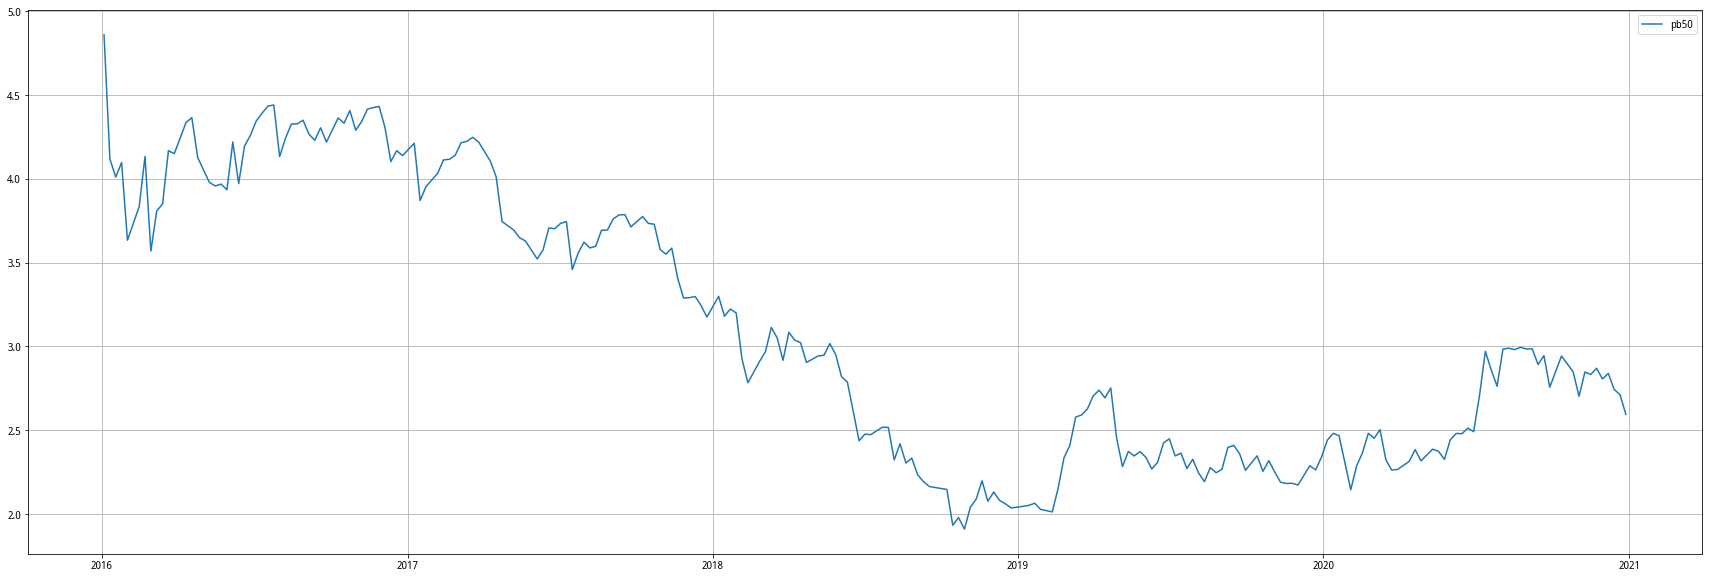

In [16]:
# Plotting the pb50 values
plt.figure(figsize=(30, 10))
plt.plot(pb50_data['date'], pb50_data['pb50'])
plt.grid()
plt.legend(['pb50'])
plt.show()

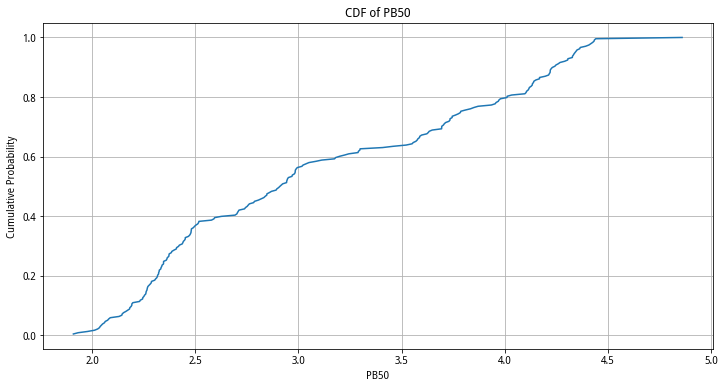

In [17]:
# Assuming you have the pb50_data DataFrame with columns 'date' and 'pb50'

# Extract the pb50 values from the DataFrame
pb50_values = pb50_data['pb50'].values

# Calculate the empirical CDF
def ecdf(x):
    sorted_x = np.sort(x)
    n = sorted_x.size
    y = np.arange(1, n+1) / n
    return sorted_x, y

x, cdf = ecdf(pb50_values)

# Plot the CDF
plt.figure(figsize=(12, 6))
plt.plot(x, cdf)
plt.xlabel('PB50')
plt.ylabel('Cumulative Probability')
plt.title('CDF of PB50')
plt.grid(True)
plt.show()

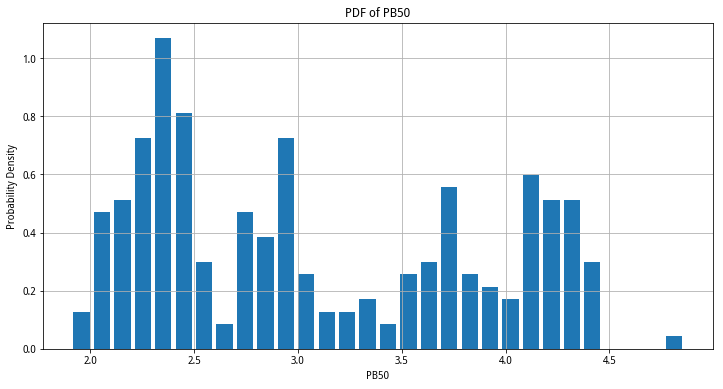

In [18]:
# Assuming you have the pb50_data DataFrame with column 'pb50'

# Extract the pb50 values from the DataFrame
pb50_values = pb50_data['pb50'].values

# Calculate the histogram
hist, bins = np.histogram(pb50_values, bins=30, density=True)

# Calculate the bin centers
bin_centers = (bins[:-1] + bins[1:]) / 2

# Calculate the width of each bar
bar_width = np.diff(bins)[0] * 0.8

# Plot the PDF as a bar chart
plt.figure(figsize=(12, 6))
plt.bar(bin_centers, hist, width=bar_width, align='center')
plt.xlabel('PB50')
plt.ylabel('Probability Density')
plt.title('PDF of PB50')
plt.grid(True)
plt.show()

### company median pb ratio weekly diatribution chart(2021-2023)

In [24]:
# Get all trade days between 2016-01-01 and 2020-12-31
trade_days = get_trade_days(start_date='2021-01-01', end_date='2023-04-30')

# Filter the trade days to include only Mondays
trade_weeks = [date for date in trade_days if date.weekday() == 0]

# Create a new DataFrame to store the PB50 data
pb50_data = pd.DataFrame(columns=['date', 'pb50'])

# Get all stock codes
stocks = get_all_securities(types=['stock'])
stock_list = stocks.index.tolist()

# Iterate over each trade week
for date in trade_weeks:
    # Get the trade days for the current week (from Monday to Friday)
    week_dates = get_trade_days(start_date=date, end_date=date + pd.Timedelta(days=4))
    
    # Get the fundamentals data (pb_ratio) for the current week
    df = get_fundamentals(query(valuation.pb_ratio).filter(valuation.code.in_(stock_list)), date)
    
    # Calculate the median pb_ratio for the current week
    pb50 = df['pb_ratio'].median()
    
    # Append the date and pb50 value to the DataFrame
    pb50_data = pb50_data.append({'date': date, 'pb50': pb50}, ignore_index=True)

# Sort the DataFrame by date
pb50_data = pb50_data.sort_values('date')

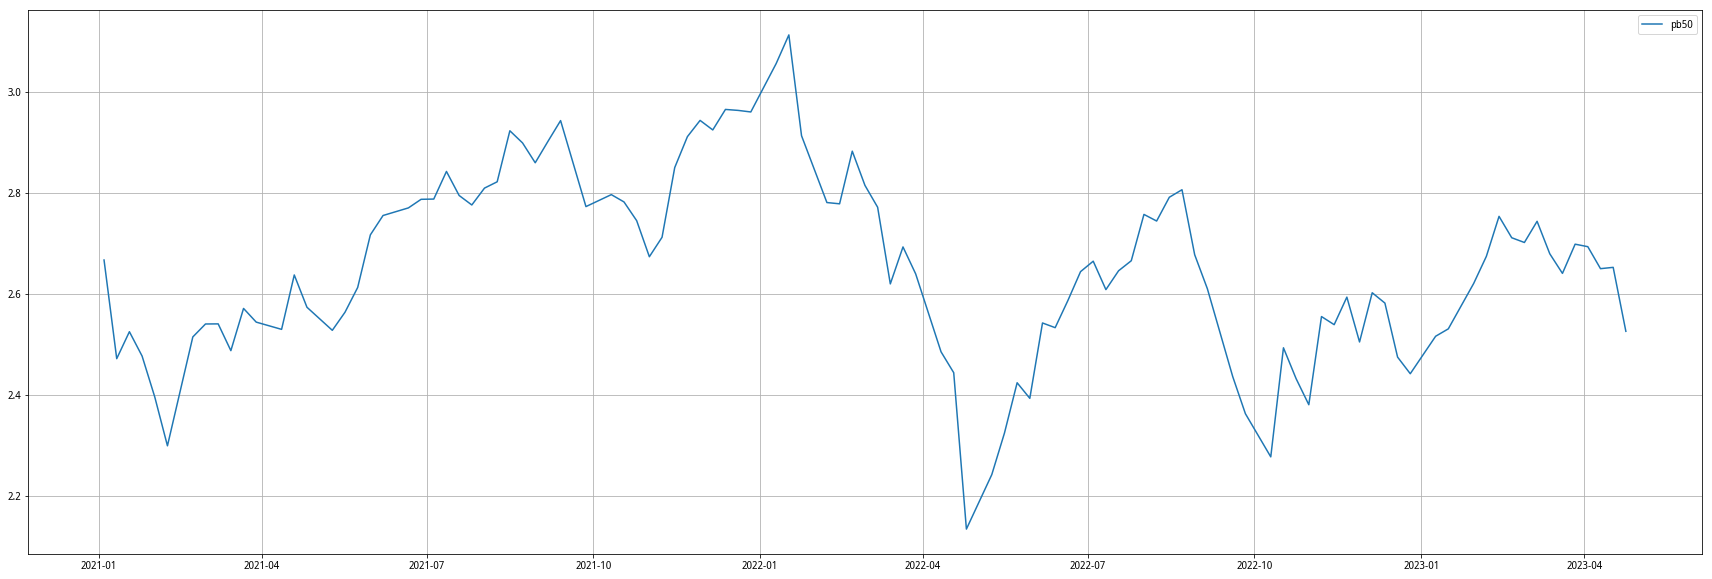

In [25]:
# Plotting the pb50 values
plt.figure(figsize=(30, 10))
plt.plot(pb50_data['date'], pb50_data['pb50'])
plt.grid()
plt.legend(['pb50'])
plt.show()

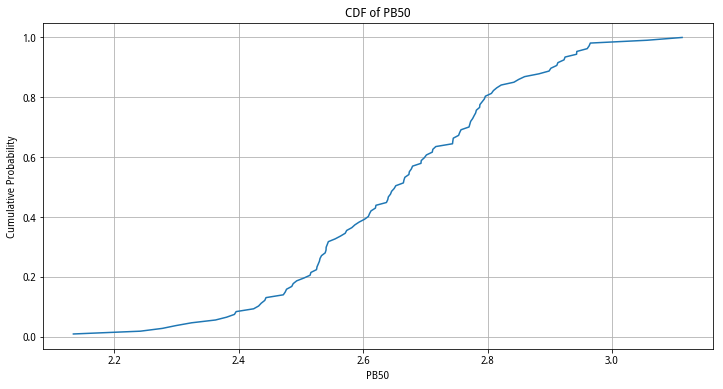

In [26]:
# Assuming you have the pb50_data DataFrame with columns 'date' and 'pb50'

# Extract the pb50 values from the DataFrame
pb50_values = pb50_data['pb50'].values

# Calculate the empirical CDF
def ecdf(x):
    sorted_x = np.sort(x)
    n = sorted_x.size
    y = np.arange(1, n+1) / n
    return sorted_x, y

x, cdf = ecdf(pb50_values)

# Plot the CDF
plt.figure(figsize=(12, 6))
plt.plot(x, cdf)
plt.xlabel('PB50')
plt.ylabel('Cumulative Probability')
plt.title('CDF of PB50')
plt.grid(True)
plt.show()

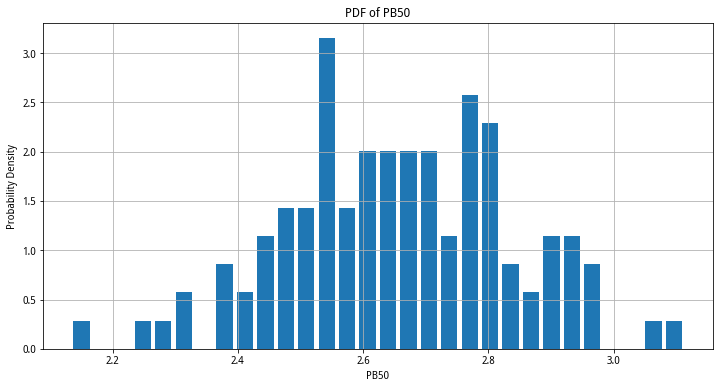

In [27]:
# Assuming you have the pb50_data DataFrame with column 'pb50'

# Extract the pb50 values from the DataFrame
pb50_values = pb50_data['pb50'].values

# Calculate the histogram
hist, bins = np.histogram(pb50_values, bins=30, density=True)

# Calculate the bin centers
bin_centers = (bins[:-1] + bins[1:]) / 2

# Calculate the width of each bar
bar_width = np.diff(bins)[0] * 0.8

# Plot the PDF as a bar chart
plt.figure(figsize=(12, 6))
plt.bar(bin_centers, hist, width=bar_width, align='center')
plt.xlabel('PB50')
plt.ylabel('Probability Density')
plt.title('PDF of PB50')
plt.grid(True)
plt.show()

## pb ps median distribution for first level industries in joinquant

In [25]:
industries = get_industries(name='sw_l1')
industries

,name,start_date
801740,国防军工I,2014-02-21
801020,采掘I,2004-02-10
801110,家用电器I,2004-02-10
801160,公用事业I,2004-02-10
801060,建筑建材I,2004-02-10
801770,通信I,2014-02-21
801010,农林牧渔I,2004-02-09
801120,食品饮料I,2004-02-10
801750,计算机I,2014-02-21
801050,有色金属I,2004-02-10


### Minning pb and ps

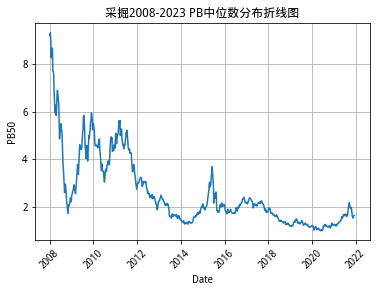

In [30]:
# Define the industry code
industry_code = '801020'  # Replace with the desired industry code

# Define the time range
start_date = '2008-01-01'
end_date = '2023-04-30'

# Get the trade days
trade_days = get_trade_days(start_date=start_date, end_date=end_date)

# Filter the trade days to include only Mondays
trade_weeks = [date for date in trade_days if date.weekday() == 0]

# Create a new DataFrame to store PB50 data
pb50_data = pd.DataFrame(columns=['date', 'pb50'])

# Iterate over each trade week
for date in trade_weeks:
    # Get the start and end date for the current week
    week_start = date
    week_end = date + timedelta(days=4)
    
    # Create an empty list to store the pb_ratio values for the week
    pb_ratios = []
    
    # Iterate over the trade days within the week
    for trade_day in trade_days:
        if week_start <= trade_day <= week_end:
            # Get the stocks in the industry for the current trade day
            stocks = get_industry_stocks(industry_code, date=trade_day)
            
            # Get the fundamentals data (pb_ratio) for the current trade day and stocks
            df = get_fundamentals(query(valuation.pb_ratio).filter(valuation.code.in_(stocks)), date=trade_day)
            
            # Add the pb_ratio values to the list
            pb_ratios.extend(df['pb_ratio'])
    
    # Calculate the median pb_ratio for the week
    pb50 = pd.Series(pb_ratios).median()
    
    # Append the date and pb50 value to the DataFrame
    pb50_data = pb50_data.append({'date': week_start, 'pb50': pb50}, ignore_index=True)

pb50_data=pb50_data.dropna()

# Plot the PB50 data
plt.plot(pb50_data['date'], pb50_data['pb50'])
plt.xlabel('Date')
plt.ylabel('PB50')
plt.title('采掘2008-2023 PB中位数分布折线图')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

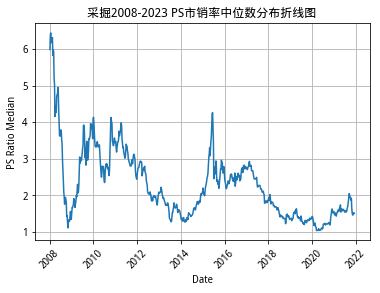

In [2]:
# Define the industry code
industry_code = '801020'  # Replace with the desired industry code

# Define the time range
start_date = '2008-01-01'
end_date = '2023-04-30'

# Get the trade days
trade_days = get_trade_days(start_date=start_date, end_date=end_date)

# Filter the trade days to include only Mondays
trade_weeks = [date for date in trade_days if date.weekday() == 0]

# Create a new DataFrame to store PS data
ps_data = pd.DataFrame(columns=['date', 'ps'])

# Iterate over each trade week
for date in trade_weeks:
    # Get the start and end date for the current week
    week_start = date
    week_end = date + timedelta(days=4)
    
    # Create an empty list to store the ps_ratio values for the week
    ps_ratios = []
    
    # Iterate over the trade days within the week
    for trade_day in trade_days:
        if week_start <= trade_day <= week_end:
            # Get the stocks in the industry for the current trade day
            stocks = get_industry_stocks(industry_code, date=trade_day)
            
            # Get the fundamentals data (ps_ratio) for the current trade day and stocks
            df = get_fundamentals(query(valuation.ps_ratio).filter(valuation.code.in_(stocks)), date=trade_day)
            
            # Add the ps_ratio values to the list
            ps_ratios.extend(df['ps_ratio'])
    
    # Calculate the median ps_ratio for the week
    ps_median = pd.Series(ps_ratios).median()
    
    # Append the date and ps_median value to the DataFrame
    ps_data = ps_data.append({'date': week_start, 'ps': ps_median}, ignore_index=True)

ps_data = ps_data.dropna()

# Plot the PS data
plt.plot(ps_data['date'], ps_data['ps'])
plt.xlabel('Date')
plt.ylabel('PS Ratio Median')
plt.title('采掘2008-2023 PS市销率中位数分布折线图')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### household applicances pb and ps

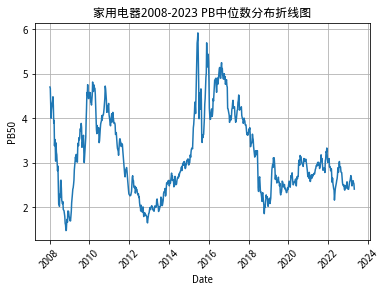

In [32]:
# Define the industry code
industry_code = '801110'  # Replace with the desired industry code

# Define the time range
start_date = '2008-01-01'
end_date = '2023-04-30'

# Get the trade days
trade_days = get_trade_days(start_date=start_date, end_date=end_date)

# Filter the trade days to include only Mondays
trade_weeks = [date for date in trade_days if date.weekday() == 0]

# Create a new DataFrame to store PB50 data
pb50_data = pd.DataFrame(columns=['date', 'pb50'])

# Iterate over each trade week
for date in trade_weeks:
    # Get the start and end date for the current week
    week_start = date
    week_end = date + timedelta(days=4)
    
    # Create an empty list to store the pb_ratio values for the week
    pb_ratios = []
    
    # Iterate over the trade days within the week
    for trade_day in trade_days:
        if week_start <= trade_day <= week_end:
            # Get the stocks in the industry for the current trade day
            stocks = get_industry_stocks(industry_code, date=trade_day)
            
            # Get the fundamentals data (pb_ratio) for the current trade day and stocks
            df = get_fundamentals(query(valuation.pb_ratio).filter(valuation.code.in_(stocks)), date=trade_day)
            
            # Add the pb_ratio values to the list
            pb_ratios.extend(df['pb_ratio'])
    
    # Calculate the median pb_ratio for the week
    pb50 = pd.Series(pb_ratios).median()
    
    # Append the date and pb50 value to the DataFrame
    pb50_data = pb50_data.append({'date': week_start, 'pb50': pb50}, ignore_index=True)

pb50_data=pb50_data.dropna()

# Plot the PB50 data
plt.plot(pb50_data['date'], pb50_data['pb50'])
plt.xlabel('Date')
plt.ylabel('PB50')
plt.title('家用电器2008-2023 PB中位数分布折线图')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

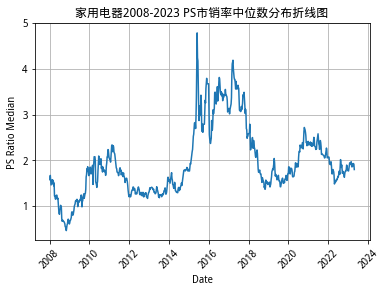

In [3]:
# Define the industry code
industry_code = '801110'  # Replace with the desired industry code

# Define the time range
start_date = '2008-01-01'
end_date = '2023-04-30'

# Get the trade days
trade_days = get_trade_days(start_date=start_date, end_date=end_date)

# Filter the trade days to include only Mondays
trade_weeks = [date for date in trade_days if date.weekday() == 0]

# Create a new DataFrame to store PS data
ps_data = pd.DataFrame(columns=['date', 'ps'])

# Iterate over each trade week
for date in trade_weeks:
    # Get the start and end date for the current week
    week_start = date
    week_end = date + timedelta(days=4)
    
    # Create an empty list to store the ps_ratio values for the week
    ps_ratios = []
    
    # Iterate over the trade days within the week
    for trade_day in trade_days:
        if week_start <= trade_day <= week_end:
            # Get the stocks in the industry for the current trade day
            stocks = get_industry_stocks(industry_code, date=trade_day)
            
            # Get the fundamentals data (ps_ratio) for the current trade day and stocks
            df = get_fundamentals(query(valuation.ps_ratio).filter(valuation.code.in_(stocks)), date=trade_day)
            
            # Add the ps_ratio values to the list
            ps_ratios.extend(df['ps_ratio'])
    
    # Calculate the median ps_ratio for the week
    ps_median = pd.Series(ps_ratios).median()
    
    # Append the date and ps_median value to the DataFrame
    ps_data = ps_data.append({'date': week_start, 'ps': ps_median}, ignore_index=True)

ps_data = ps_data.dropna()

# Plot the PS data
plt.plot(ps_data['date'], ps_data['ps'])
plt.xlabel('Date')
plt.ylabel('PS Ratio Median')
plt.title('家用电器2008-2023 PS市销率中位数分布折线图')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



### public utility pb and ps

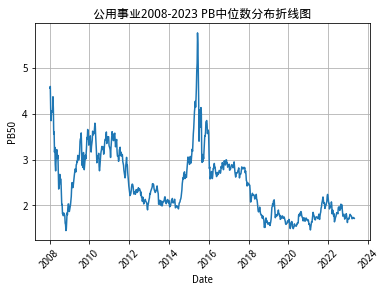

In [33]:
# Define the industry code
industry_code = '801160'  # Replace with the desired industry code

# Define the time range
start_date = '2008-01-01'
end_date = '2023-04-30'

# Get the trade days
trade_days = get_trade_days(start_date=start_date, end_date=end_date)

# Filter the trade days to include only Mondays
trade_weeks = [date for date in trade_days if date.weekday() == 0]

# Create a new DataFrame to store PB50 data
pb50_data = pd.DataFrame(columns=['date', 'pb50'])

# Iterate over each trade week
for date in trade_weeks:
    # Get the start and end date for the current week
    week_start = date
    week_end = date + timedelta(days=4)
    
    # Create an empty list to store the pb_ratio values for the week
    pb_ratios = []
    
    # Iterate over the trade days within the week
    for trade_day in trade_days:
        if week_start <= trade_day <= week_end:
            # Get the stocks in the industry for the current trade day
            stocks = get_industry_stocks(industry_code, date=trade_day)
            
            # Get the fundamentals data (pb_ratio) for the current trade day and stocks
            df = get_fundamentals(query(valuation.pb_ratio).filter(valuation.code.in_(stocks)), date=trade_day)
            
            # Add the pb_ratio values to the list
            pb_ratios.extend(df['pb_ratio'])
    
    # Calculate the median pb_ratio for the week
    pb50 = pd.Series(pb_ratios).median()
    
    # Append the date and pb50 value to the DataFrame
    pb50_data = pb50_data.append({'date': week_start, 'pb50': pb50}, ignore_index=True)

pb50_data=pb50_data.dropna()

# Plot the PB50 data
plt.plot(pb50_data['date'], pb50_data['pb50'])
plt.xlabel('Date')
plt.ylabel('PB50')
plt.title('公用事业2008-2023 PB中位数分布折线图')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

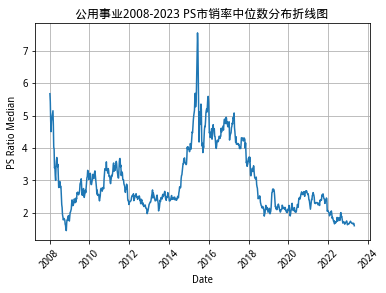

In [4]:
# Define the industry code
industry_code = '801160'  # Replace with the desired industry code

# Define the time range
start_date = '2008-01-01'
end_date = '2023-04-30'

# Get the trade days
trade_days = get_trade_days(start_date=start_date, end_date=end_date)

# Filter the trade days to include only Mondays
trade_weeks = [date for date in trade_days if date.weekday() == 0]

# Create a new DataFrame to store PS data
ps_data = pd.DataFrame(columns=['date', 'ps'])

# Iterate over each trade week
for date in trade_weeks:
    # Get the start and end date for the current week
    week_start = date
    week_end = date + timedelta(days=4)
    
    # Create an empty list to store the ps_ratio values for the week
    ps_ratios = []
    
    # Iterate over the trade days within the week
    for trade_day in trade_days:
        if week_start <= trade_day <= week_end:
            # Get the stocks in the industry for the current trade day
            stocks = get_industry_stocks(industry_code, date=trade_day)
            
            # Get the fundamentals data (ps_ratio) for the current trade day and stocks
            df = get_fundamentals(query(valuation.ps_ratio).filter(valuation.code.in_(stocks)), date=trade_day)
            
            # Add the ps_ratio values to the list
            ps_ratios.extend(df['ps_ratio'])
    
    # Calculate the median ps_ratio for the week
    ps_median = pd.Series(ps_ratios).median()
    
    # Append the date and ps_median value to the DataFrame
    ps_data = ps_data.append({'date': week_start, 'ps': ps_median}, ignore_index=True)

ps_data = ps_data.dropna()

# Plot the PS data
plt.plot(ps_data['date'], ps_data['ps'])
plt.xlabel('Date')
plt.ylabel('PS Ratio Median')
plt.title('公用事业2008-2023 PS市销率中位数分布折线图')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### food and drink pb and ps

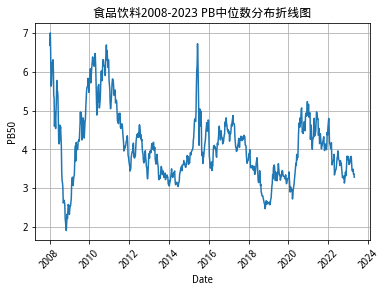

In [37]:
# Define the industry code
industry_code = '801120'  # Replace with the desired industry code

# Define the time range
start_date = '2008-01-01'
end_date = '2023-04-30'

# Get the trade days
trade_days = get_trade_days(start_date=start_date, end_date=end_date)

# Filter the trade days to include only Mondays
trade_weeks = [date for date in trade_days if date.weekday() == 0]

# Create a new DataFrame to store PB50 data
pb50_data = pd.DataFrame(columns=['date', 'pb50'])

# Iterate over each trade week
for date in trade_weeks:
    # Get the start and end date for the current week
    week_start = date
    week_end = date + timedelta(days=4)
    
    # Create an empty list to store the pb_ratio values for the week
    pb_ratios = []
    
    # Iterate over the trade days within the week
    for trade_day in trade_days:
        if week_start <= trade_day <= week_end:
            # Get the stocks in the industry for the current trade day
            stocks = get_industry_stocks(industry_code, date=trade_day)
            
            # Get the fundamentals data (pb_ratio) for the current trade day and stocks
            df = get_fundamentals(query(valuation.pb_ratio).filter(valuation.code.in_(stocks)), date=trade_day)
            
            # Add the pb_ratio values to the list
            pb_ratios.extend(df['pb_ratio'])
    
    # Calculate the median pb_ratio for the week
    pb50 = pd.Series(pb_ratios).median()
    
    # Append the date and pb50 value to the DataFrame
    pb50_data = pb50_data.append({'date': week_start, 'pb50': pb50}, ignore_index=True)

pb50_data=pb50_data.dropna()

# Plot the PB50 data
plt.plot(pb50_data['date'], pb50_data['pb50'])
plt.xlabel('Date')
plt.ylabel('PB50')
plt.title('食品饮料2008-2023 PB中位数分布折线图')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

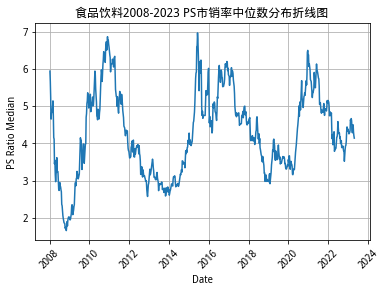

In [5]:
# Define the industry code
industry_code = '801120'  # Replace with the desired industry code

# Define the time range
start_date = '2008-01-01'
end_date = '2023-04-30'

# Get the trade days
trade_days = get_trade_days(start_date=start_date, end_date=end_date)

# Filter the trade days to include only Mondays
trade_weeks = [date for date in trade_days if date.weekday() == 0]

# Create a new DataFrame to store PS data
ps_data = pd.DataFrame(columns=['date', 'ps'])

# Iterate over each trade week
for date in trade_weeks:
    # Get the start and end date for the current week
    week_start = date
    week_end = date + timedelta(days=4)
    
    # Create an empty list to store the ps_ratio values for the week
    ps_ratios = []
    
    # Iterate over the trade days within the week
    for trade_day in trade_days:
        if week_start <= trade_day <= week_end:
            # Get the stocks in the industry for the current trade day
            stocks = get_industry_stocks(industry_code, date=trade_day)
            
            # Get the fundamentals data (ps_ratio) for the current trade day and stocks
            df = get_fundamentals(query(valuation.ps_ratio).filter(valuation.code.in_(stocks)), date=trade_day)
            
            # Add the ps_ratio values to the list
            ps_ratios.extend(df['ps_ratio'])
    
    # Calculate the median ps_ratio for the week
    ps_median = pd.Series(ps_ratios).median()
    
    # Append the date and ps_median value to the DataFrame
    ps_data = ps_data.append({'date': week_start, 'ps': ps_median}, ignore_index=True)

ps_data = ps_data.dropna()

# Plot the PS data
plt.plot(ps_data['date'], ps_data['ps'])
plt.xlabel('Date')
plt.ylabel('PS Ratio Median')
plt.title('食品饮料2008-2023 PS市销率中位数分布折线图')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### fishing and agriculture pb and ps

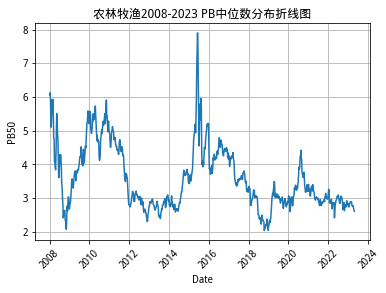

In [35]:
# Define the industry code
industry_code = '801010'  # Replace with the desired industry code

# Define the time range
start_date = '2008-01-01'
end_date = '2023-04-30'

# Get the trade days
trade_days = get_trade_days(start_date=start_date, end_date=end_date)

# Filter the trade days to include only Mondays
trade_weeks = [date for date in trade_days if date.weekday() == 0]

# Create a new DataFrame to store PB50 data
pb50_data = pd.DataFrame(columns=['date', 'pb50'])

# Iterate over each trade week
for date in trade_weeks:
    # Get the start and end date for the current week
    week_start = date
    week_end = date + timedelta(days=4)
    
    # Create an empty list to store the pb_ratio values for the week
    pb_ratios = []
    
    # Iterate over the trade days within the week
    for trade_day in trade_days:
        if week_start <= trade_day <= week_end:
            # Get the stocks in the industry for the current trade day
            stocks = get_industry_stocks(industry_code, date=trade_day)
            
            # Get the fundamentals data (pb_ratio) for the current trade day and stocks
            df = get_fundamentals(query(valuation.pb_ratio).filter(valuation.code.in_(stocks)), date=trade_day)
            
            # Add the pb_ratio values to the list
            pb_ratios.extend(df['pb_ratio'])
    
    # Calculate the median pb_ratio for the week
    pb50 = pd.Series(pb_ratios).median()
    
    # Append the date and pb50 value to the DataFrame
    pb50_data = pb50_data.append({'date': week_start, 'pb50': pb50}, ignore_index=True)

pb50_data=pb50_data.dropna()

# Plot the PB50 data
plt.plot(pb50_data['date'], pb50_data['pb50'])
plt.xlabel('Date')
plt.ylabel('PB50')
plt.title('农林牧渔2008-2023 PB中位数分布折线图')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

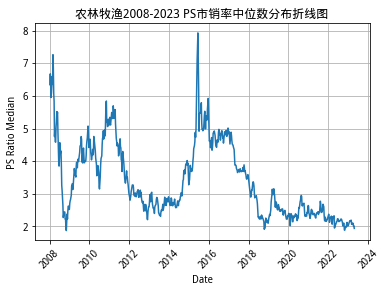

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta

# Define the industry code
industry_code = '801010'  # Replace with the desired industry code

# Define the time range
start_date = '2008-01-01'
end_date = '2023-04-30'

# Get the trade days
trade_days = get_trade_days(start_date=start_date, end_date=end_date)

# Filter the trade days to include only Mondays
trade_weeks = [date for date in trade_days if date.weekday() == 0]

# Create a new DataFrame to store PS data
ps_data = pd.DataFrame(columns=['date', 'ps'])

# Iterate over each trade week
for date in trade_weeks:
    # Get the start and end date for the current week
    week_start = date
    week_end = date + timedelta(days=4)
    
    # Create an empty list to store the ps_ratio values for the week
    ps_ratios = []
    
    # Iterate over the trade days within the week
    for trade_day in trade_days:
        if week_start <= trade_day <= week_end:
            # Get the stocks in the industry for the current trade day
            stocks = get_industry_stocks(industry_code, date=trade_day)
            
            # Get the fundamentals data (ps_ratio) for the current trade day and stocks
            df = get_fundamentals(query(valuation.ps_ratio).filter(valuation.code.in_(stocks)), date=trade_day)
            
            # Add the ps_ratio values to the list
            ps_ratios.extend(df['ps_ratio'])
    
    # Calculate the median ps_ratio for the week
    ps_median = pd.Series(ps_ratios).median()
    
    # Append the date and ps_median value to the DataFrame
    ps_data = ps_data.append({'date': week_start, 'ps': ps_median}, ignore_index=True)

ps_data = ps_data.dropna()

# Plot the PS data
plt.plot(ps_data['date'], ps_data['ps'])
plt.xlabel('Date')
plt.ylabel('PS Ratio Median')
plt.title('农林牧渔2008-2023 PS市销率中位数分布折线图')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()